In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r"./uber_clean.csv")
df.head()

,Date/Time,Lat,Lon,Base,Date
0,2014-07-01 0:03,40.7586,-73.9706,B02512,Tuesday
1,2014-07-01 0:05,40.7605,-73.9994,B02512,Tuesday
2,2014-07-01 0:06,40.7320,-73.9999,B02512,Tuesday
3,2014-07-01 0:09,40.7635,-73.9793,B02512,Tuesday
4,2014-07-01 0:20,40.7204,-74.0047,B02512,Tuesday


In [4]:
x = df[['Lat','Lon']]
x.head()

,Lat,Lon
0,40.7586,-73.9706
1,40.7605,-73.9994
2,40.7320,-73.9999
3,40.7635,-73.9793
4,40.7204,-74.0047


In [6]:
model = KMeans(n_clusters=7)
y_kmeans = model.fit_predict(x)

/Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
df['y'] = y_kmeans
df.head()

,Date/Time,Lat,Lon,Base,Date,y
0,2014-07-01 0:03,40.7586,-73.9706,B02512,Tuesday,1
1,2014-07-01 0:05,40.7605,-73.9994,B02512,Tuesday,1
2,2014-07-01 0:06,40.7320,-73.9999,B02512,Tuesday,2
3,2014-07-01 0:09,40.7635,-73.9793,B02512,Tuesday,1
4,2014-07-01 0:20,40.7204,-74.0047,B02512,Tuesday,2


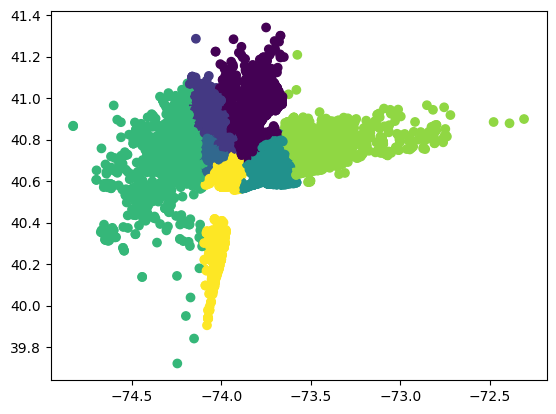

In [10]:
plt.scatter(df['Lon'], df['Lat'], c=df['y'])

In [11]:
model.inertia_

870.3250237900256

In [12]:
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i)
    y_kmeans = model.fit_predict(x)
    wcss.append(model.inertia_)

/Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/sklearn/cluster/

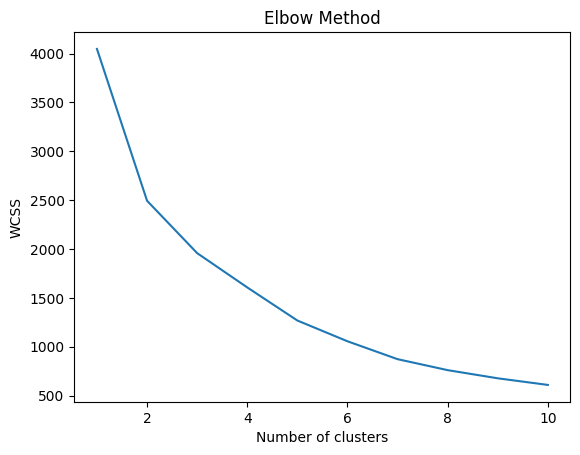

In [13]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()